In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [8]:
column_name=['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg','os','battery_capacity','storage','screen_size']

# names = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
xy_1 = pd.read_table('ZZ0702GuangFa_Samples100000_FeatureData.txt',names=column_name)
xy_1.head()

,id,target,card_type,netlong,owner_city,arpu,out_prdct_fee,prdct_fee,point_fee,myth_fee,...,age,adis,arpu_avg,myth_fee_avg,out_prdct_fee_avg,prdct_fee_avg,os,battery_capacity,storage,screen_size
0,13013302938,1,0.0,NaN,联通联通,9.0,0.0,0.0,0.0,0.0,...,NaN,NaN,38.863332,0.0,NaN,0.0,4.0,4120mAh,64GB,6.0
1,13022062073,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13035901978,1,NaN,NaN,NaN,37.2,0.0,0.0,0.0,0.0,...,NaN,NaN,37.013334,0.0,NaN,0.0,NaN,NaN,NaN,NaN
3,13042151031,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3050mAh,16/64GB,5.0
4,13045173577,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
xy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103513 entries, 0 to 103512
Data columns (total 36 columns):
id                   103513 non-null int64
target               103513 non-null int64
card_type            102937 non-null float64
netlong              38493 non-null float64
owner_city           102937 non-null object
arpu                 102821 non-null float64
out_prdct_fee        102821 non-null float64
prdct_fee            102821 non-null float64
point_fee            102821 non-null float64
myth_fee             102821 non-null float64
brand                74599 non-null object
listing_date         73871 non-null float64
listing_price        70781 non-null float64
nettime              38493 non-null object
user_level           58576 non-null float64
sex                  41165 non-null float64
family_client        25125 non-null float64
group_client         19995 non-null float64
music                16352 non-null float64
expirationtime       4165 non-null object
video_mem

In [10]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
#cat_list = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
cat_list=column_name
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.id特征的类型数量是：100000
2.target特征的类型数量是：2
3.card_type特征的类型数量是：6
4.netlong特征的类型数量是：59
5.owner_city特征的类型数量是：265
6.arpu特征的类型数量是：19328
7.out_prdct_fee特征的类型数量是：4820
8.prdct_fee特征的类型数量是：3439
9.point_fee特征的类型数量是：7908
10.myth_fee特征的类型数量是：153
11.brand特征的类型数量是：679
12.listing_date特征的类型数量是：1105
13.listing_price特征的类型数量是：581
14.nettime特征的类型数量是：37348
15.user_level特征的类型数量是：8
16.sex特征的类型数量是：2
17.family_client特征的类型数量是：1
18.group_client特征的类型数量是：1
19.music特征的类型数量是：1
20.expirationtime特征的类型数量是：4161
21.video_member特征的类型数量是：1
22.other_tv特征的类型数量是：1
23.finance特征的类型数量是：1
24.bank特征的类型数量是：1
25.campus_client特征的类型数量是：1
26.migu_tv特征的类型数量是：1
27.age特征的类型数量是：46
28.adis特征的类型数量是：1
29.arpu_avg特征的类型数量是：53525
30.myth_fee_avg特征的类型数量是：408
31.out_prdct_fee_avg特征的类型数量是：17066
32.prdct_fee_avg特征的类型数量是：8294
33.os特征的类型数量是：10
34.battery_capacity特征的类型数量是：430
35.storage特征的类型数量是：135
36.screen_size特征的类型数量是：69


In [11]:
# 去除重复行：
xy_1.drop_duplicates(keep='first',inplace=True)
xy_1.reset_index(inplace=True)

(103513, 37)

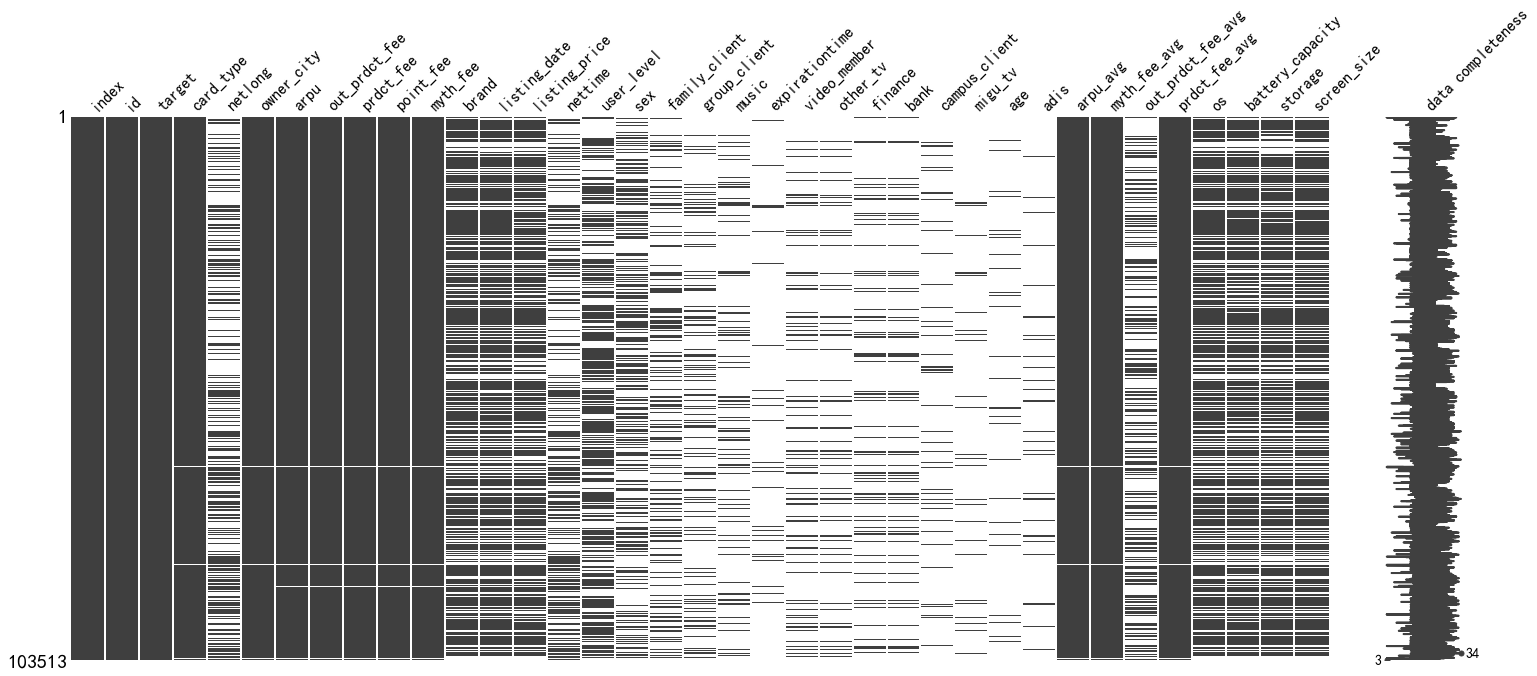

In [12]:
msno.matrix(xy_1,labels = True)
xy_1.shape

In [13]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,37
Number of observations,103513
Total Missing (%),40.6%
Total size in memory,29.2 MiB
Average record size in memory,296.0 B
Numeric,16
Categorical,6
Boolean,11
Date,0
Text (Unique),0
Rejected,4


In [14]:
#根据手机上市时间衍生出，上市到现在的累计月份变量listing_data_months
#核心代码，转换，array转换成str使用[:]，转换成int加减
def month_sept(data):
    lst1=[]
    for n in range(len(data)):
        a=data.loc[n]['listing_date']
        if '2019' in str(a):
            month_num = str(a)[4:6]
            lst1.append(month_num)
        elif '2018' in str(a):
            month_num = 12-int(str(a)[4:6])+4
            lst1.append(month_num)
        elif( '2017' in str(a)) and (str(a)!='2017.0'):
            month_num = 12-int(str(a)[4:6])+4+12
            lst1.append(month_num)
        elif '2016' in str(a)and (str(a)!='2016.0'):
            month_num = 12-int(str(a)[4:6])+4+24
            lst1.append(month_num)
        elif '2015' in str(a)and (str(a)!='2015.0'):
            month_num = 12-int(str(a)[4:6])+4+36
            lst1.append(month_num)
        elif '2014' in str(a)and (str(a)!='2014.0'):
            month_num = 12-int(str(a)[4:6])+4+48
            lst1.append(month_num)
        elif '2013' in str(a) and(str(a)!='2013.0'):
            month_num = 12-int(str(a)[4:6])+4+60
            lst1.append(month_num)
    c= pd.concat([xy_1,pd.DataFrame(lst1)],axis=1)
    c.rename(columns={0:'listing_data_months'},inplace = True)
    return c
xy_2 = month_sept(xy_1)

In [1]:
xy_3 = pd.read_table('city_ranking.txt',names = ['owner_city','owner_city_level'])
xy_5 = pd.merge(xy_2,xy_3,on='owner_city',how = 'left')

NameError: name 'pd' is not defined

In [16]:
xy_5.columns

Index(['index', 'id', 'target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [58]:
usefulcolumnlist=['target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'brand',
       'listing_price', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 
       'video_member','finance', 'bank',
       'arpu_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'battery_capacity',
       'storage', 'screen_size', 'listing_data_months', 'owner_city_level']

xy_6 = xy_5[usefulcolumnlist]


In [59]:
xy_6[['battery_capacity','storage','screen_size']].head()

,battery_capacity,storage,screen_size
0,4120mAh,64GB,6.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3050mAh,16/64GB,5.0
4,NaN,NaN,NaN


In [60]:
xy_6['battery_capacity'].value_counts()

def DealBatteryFormat(RowSeriers):
    import re
    if RowSeriers.battery_capacity!=RowSeriers.battery_capacity:
        return 9999
    else:
        Battery = RowSeriers.battery_capacity
        Batterynum = re.findall('\d+',Battery)[0]
        return int(Batterynum)

xy_6['battery_capacity']=xy_6.apply(DealBatteryFormat,axis=1)

In [61]:
xy_6['battery_capacity'].value_counts().head()

9999    32836
3000     9860
4000     4907
2000     4231
1715     2815
Name: battery_capacity, dtype: int64

In [62]:
def DealstorageFormat(RowSeriers):
    storagestr=str(RowSeriers.storage)
   
    if 'G' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'G' in storagesplit:
            
            return storagesplit.split('G')[0]+'GB'
        else:            
            return storagesplit+'GB'
    if 'M' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'M' in storagesplit:
            return storagesplit.split('M')[0]+'MB'
        else:
            return storagesplit+'MB'
    else:
        return storagestr    

xy_6['storage']=xy_6.apply(DealstorageFormat,axis=1)

In [63]:
xy_6['battery_capacity'].value_counts()/len(xy_6['battery_capacity'])

9999       0.312620
3000       0.093873
4000       0.046718
2000       0.040282
1715       0.026801
1800       0.021212
2900       0.020812
2400       0.019555
2200       0.019374
3100       0.018565
4100       0.014719
3050       0.013767
2750       0.013710
1900       0.013653
3010       0.013062
3075       0.012653
2850       0.012596
2500       0.012577
2300       0.012567
2910       0.011967
1960       0.011491
2600       0.010796
2550       0.010768
1500       0.010720
800        0.008759
2350       0.008016
3200       0.007521
3340       0.007426
2100       0.005722
1700       0.005579
             ...   
6010       0.000010
2130       0.000010
570        0.000010
1460       0.000010
2780       0.000010
280        0.000010
8220       0.000010
9501320    0.000010
1101       0.000010
2430       0.000010
1780       0.000010
3560       0.000010
5382420    0.000010
2515       0.000010
2730       0.000010
300        0.000010
3290       0.000010
1390       0.000010
7306       0.000010


In [64]:
xy_6['finance'].value_counts()
xy_6['finance'] = xy_6['finance'].fillna(9999)
xy_6['finance'].value_counts()

xy_6['bank'].value_counts()
xy_6['bank'] = xy_6['bank'].fillna(9999)
xy_6['bank'].value_counts()

xy_6['owner_city'].value_counts()
xy_6['owner_city'] = xy_6['owner_city'].fillna(9999)
xy_6['owner_city'].value_counts()

xy_6['card_type'].value_counts()
xy_6['card_type'] = xy_6['card_type'].fillna(9999)
xy_6['card_type'].value_counts()

xy_6['netlong'].value_counts()
xy_6['netlong'] = xy_6['netlong'].fillna(9999)
xy_6['netlong'].value_counts()

# arpu 空值填充为999 ，异常值处理
xy_6['arpu'].value_counts()
xy_6['arpu'].describe()
xy_6['arpu'][xy_6['arpu']>500].value_counts()#u+1.5标准差3000
#xy_6['arpu'][xy_6['arpu']>500] = 41.82#中位数替换异常值
xy_6['arpu'] = xy_6['arpu'].fillna(9999)
xy_6['arpu'].value_counts()
# arpu_avg
xy_6['arpu_avg'].value_counts()#空值填充为999 ，异常值处理
xy_6['arpu_avg'].describe()
xy_6['arpu_avg'][xy_6['arpu_avg']>3000].value_counts()#u+1.5标准差3000
#xy_6['arpu_avg'][xy_6['arpu_avg']>3000] = 43.54#中位数替换异常值
xy_6['arpu_avg'] = xy_6['arpu_avg'].fillna(9999)
xy_6['arpu_avg'].value_counts()

# out_prdct_fee 空值填充为999，异常值处理,Nan没超过30%，按时0值超过了50%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee'].value_counts()
xy_6['out_prdct_fee'].describe()
xy_6['out_prdct_fee'][xy_6['out_prdct_fee']>0] = 1
xy_6['out_prdct_fee'] = xy_6['out_prdct_fee'].fillna(9999)
xy_6['out_prdct_fee'].value_counts()
# out_prdct_fee_avg Nan超过30%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee_avg'].value_counts()
xy_6['out_prdct_fee_avg'].describe()
xy_6['out_prdct_fee_avg'][xy_6['out_prdct_fee_avg']>0] = 1
xy_6['out_prdct_fee_avg'] = xy_6['out_prdct_fee_avg'].fillna(9999)
xy_6['out_prdct_fee_avg'].value_counts()

# prdct_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['prdct_fee'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee'][xy_6['prdct_fee']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# xy_6['prdct_fee'].describe()
xy_6['prdct_fee'][xy_6['prdct_fee']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee'][xy_6['prdct_fee']>500] = 23
xy_6['prdct_fee'] = xy_6['prdct_fee'].fillna(9999)
xy_6['prdct_fee'].value_counts()
# prdct_fee_avg空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['prdct_fee_avg'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
xy_6['prdct_fee_avg'].describe()
xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500] = 24.6
xy_6['prdct_fee_avg'] = xy_6['prdct_fee_avg'].fillna(9999)
xy_6['prdct_fee_avg'].value_counts()

# point_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值（27824）超过50%，构造（空，0，大于0三类）
xy_6['point_fee'].value_counts()
xy_6['point_fee'][xy_6['point_fee']>0] = 1
xy_6['point_fee'] = xy_6['point_fee'].fillna(9999)
xy_6['point_fee'].value_counts()

# sex 构造3类
xy_6['sex'].value_counts()
xy_6['sex'] = xy_6['sex'].fillna(9999)
xy_6['sex'].value_counts()

# family_client Nan超过30%，构造（空，1两类）
xy_6['family_client'].value_counts()
xy_6['family_client'] = xy_6['family_client'].fillna(9999)
xy_6['family_client'].value_counts()

# group_client  Nan超过30%，构造（空，1两类）
xy_6['group_client'].value_counts()
xy_6['group_client'] = xy_6['group_client'].fillna(9999)
xy_6['group_client'].value_counts()

# music  Nan超过30%，构造（空，1两类）
xy_6['music'].value_counts()
xy_6['music'] = xy_6['music'].fillna(9999)
xy_6['music'].value_counts()

# video_member Nan超过30%，构造（空，1两类）
xy_6['video_member'].value_counts()
xy_6['video_member'][xy_6['video_member'].notnull()] = 1
xy_6['video_member'] = xy_6['video_member'].fillna(9999)
xy_6['video_member'].value_counts()


# listing_data_months 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['listing_data_months'].value_counts()
xy_6['listing_data_months'] = xy_6['listing_data_months'].fillna(9999)
xy_6['listing_data_months'].value_counts()

# user_level  空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['user_level'].value_counts()
xy_6['user_level'] = xy_6['user_level'].fillna(9999)
xy_6['user_level'].value_counts()

# listing_price 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['listing_price'].value_counts()
xy_6['listing_price'] = xy_6['listing_price'].fillna(9999)
xy_6['listing_price'].value_counts()

# brand 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['brand'].value_counts()
xy_6['brand'] = xy_6['brand'].fillna(9999)
xy_6['brand'].value_counts()

# owner_city_level
xy_6['owner_city_level'].value_counts()
xy_6['owner_city_level'] = xy_6['owner_city_level'].fillna(9999)
xy_6['owner_city_level'].value_counts()
#以上，异常值，空值处理完毕

xy_6['brand'].value_counts()
xy_6['brand'][xy_6['brand']==9999] = '空值'
xy_6['brand'][~xy_6['brand'].isin(['vivo','OPPO','苹果','小米','华为','华为荣耀','三星','金立','酷派','魅族','空值'])] ='其它品牌'
xy_6['brand'].value_counts()

# ['battery_capacity','storage','screen_size']
xy_6['battery_capacity'] = xy_6['battery_capacity'].fillna(9999)
xy_6['battery_capacity'].value_counts()
# xy_6['battery_capacity'][xy_6['battery_capacity']=='nan'] = '空值'
# xy_6['battery_capacity'][~xy_6['battery_capacity'].isin(['3000mah','nan','4000mah','1715mah','3050mah','2000mah','1800mah','2750mah','2910mah','1960mah','2900mah','2400mah','3010mah','3100mah','2200mah','2930mah','2850mah','2600mah','2300mah','4100mah','2550mah','3075mah','2500mah','1900mah','2350mah'])] ='其它电池'

xy_6['storage'] = xy_6['storage'].fillna('空值')
xy_6['storage'][~xy_6['storage'].isin(['nan','16GB','32GB','64GB','8GB','4GB','32MB','128MB','512MB','64MB','128GB','256MB','8MB','4MB','16MB'])] ='其它存储'

xy_6['screen_size'] = xy_6['screen_size'].fillna(99)
#xy_6['screen_size']=xy_6['screen_size'].astype(str)
#xy_6['screen_size'][~xy_6['screen_size'].isin(['5.5','4.7','5','5.2','4','6','5.7','5.8','4.5','5.1','5.9','3.5','空值'])] ='其它屏幕'


# #以上，异常值，空值处理完毕

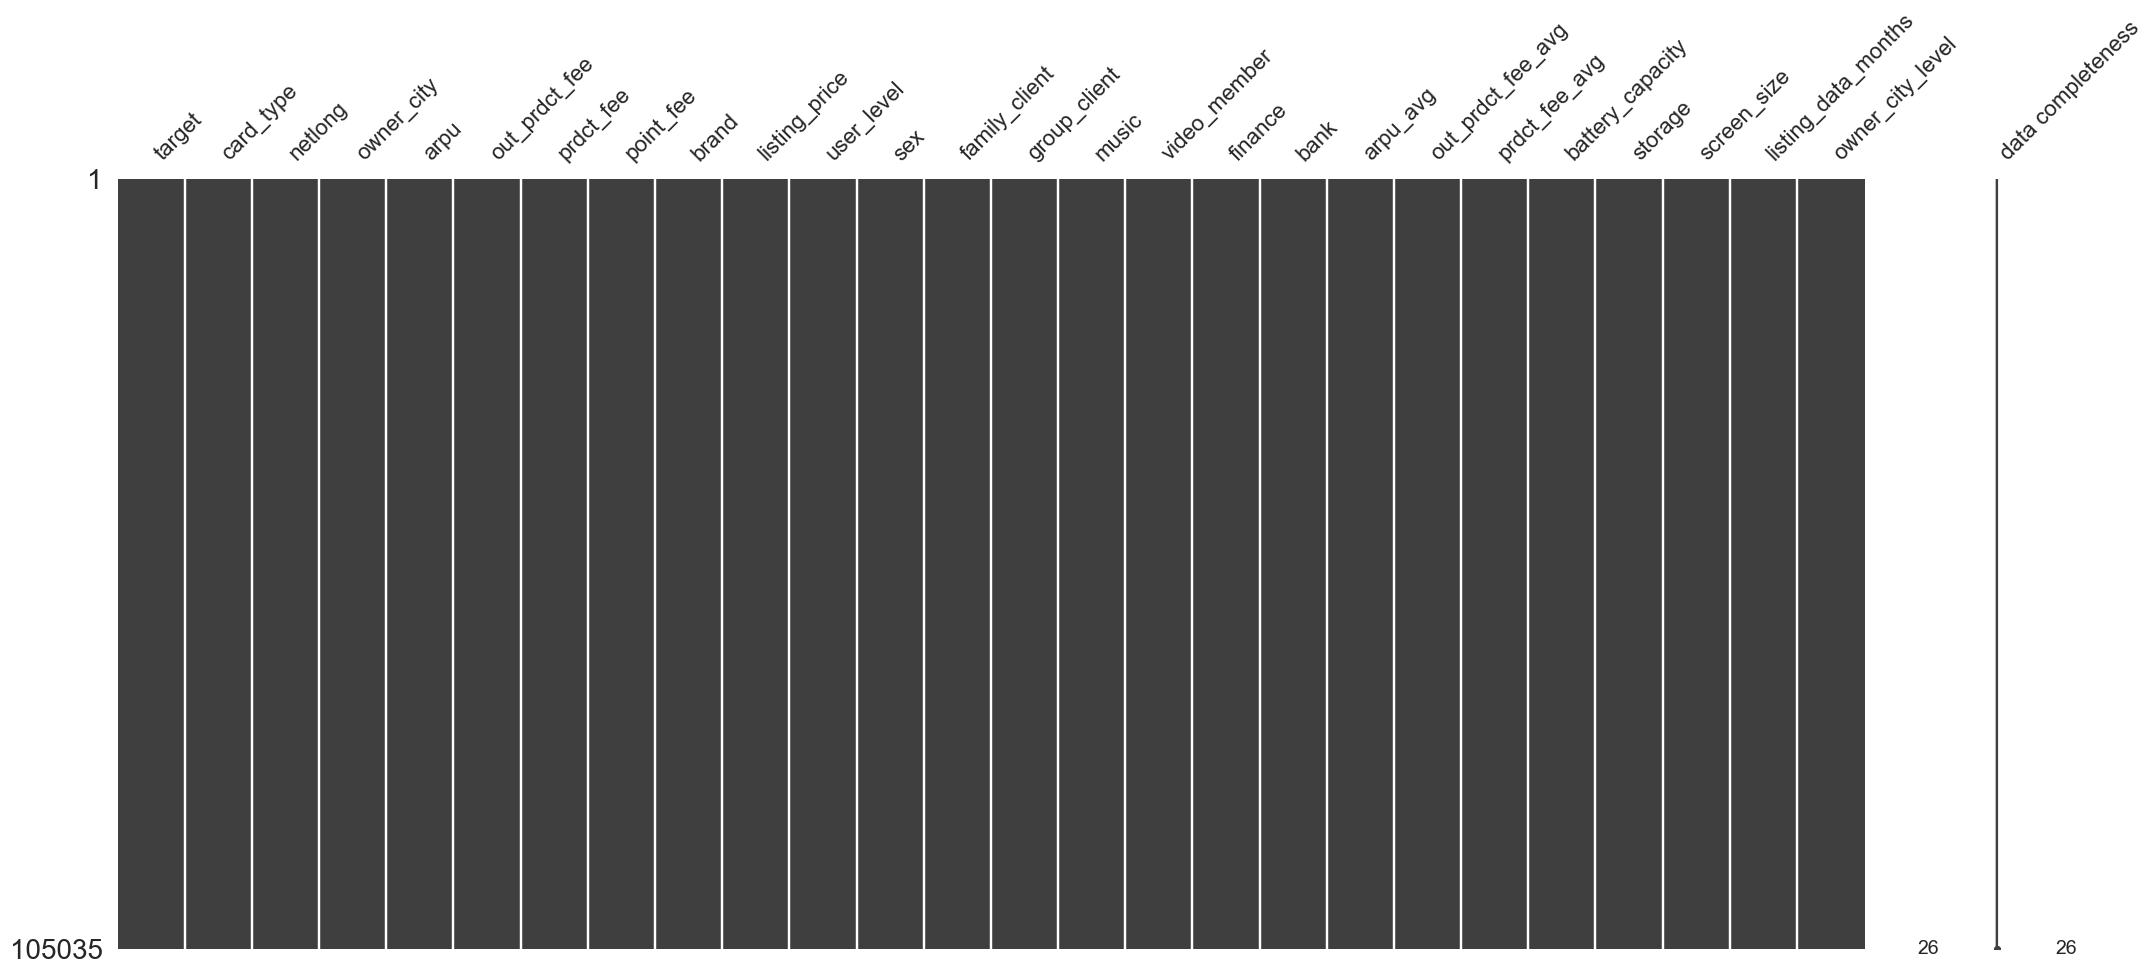

In [65]:
msno.matrix(xy_6,labels = True)

In [66]:
pandas_profiling.ProfileReport(xy_6)

Number of variables,26
Number of observations,105035
Total Missing (%),0.0%
Total size in memory,21.6 MiB
Average record size in memory,216.0 B
Numeric,13
Categorical,3
Boolean,6
Date,0
Text (Unique),0
Rejected,4


In [67]:
xy_6.columns

Index(['target', 'card_type', 'netlong', 'owner_city', 'arpu', 'out_prdct_fee',
       'prdct_fee', 'point_fee', 'brand', 'listing_price', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'video_member', 'finance',
       'bank', 'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'battery_capacity', 'storage', 'screen_size', 'listing_data_months',
       'owner_city_level'],
      dtype='object')

In [68]:
usefulcolumn2=['target', 'card_type', 'netlong', 'owner_city', 'arpu', 'out_prdct_fee',
       'prdct_fee', 'brand', 'listing_price', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'video_member', 'finance',
       'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'battery_capacity', 'storage', 'screen_size', 'listing_data_months',
       'owner_city_level']

xy_6=xy_6[usefulcolumn2]

xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [69]:
for columns in usefulcolumn2:
    print(columns,len(xy_6[columns].value_counts()))

target 2
arpu 19329
battery_capacity 282
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_data_months 61
listing_price 581
music 2
netlong 60
out_prdct_fee 3
out_prdct_fee_avg 3
owner_city 266
owner_city_level 11
prdct_fee 3440
screen_size 70
sex 3
storage 16
user_level 9
video_member 2


In [70]:
#核心代码：遍历版分箱操作
def column_binning(data):
    column_list = ['arpu','battery_capacity','listing_data_months','listing_price','netlong','prdct_fee']
    xy_10 = data
    for column in column_list:
        print(column)
        xy_10.insert(2,column+'_derive_1',xy_10[column])
        xy_7 = xy_10[(xy_10[column+'_derive_1'] == 9999) | (xy_10[column+'_derive_1'] == 0)]
        xy_8 = xy_10[(0<xy_10[column+'_derive_1'])&(xy_10[column+'_derive_1']<9999)]
        xy_8[column+'_derive_1'] = pd.qcut(xy_8[column+'_derive_1'],8)
        xy_9 = pd.concat([xy_8,xy_7],axis = 0)
        xy_10 = xy_9#循环一次的结果作为下一次循环的开始数据，不能直接给data复制，所以需要有xy_10这个中间变量
    return xy_9
xy_9=column_binning(xy_6)

arpu
battery_capacity
listing_data_months
listing_price
netlong
prdct_fee


In [71]:
xy_9.to_excel('20190625广发_信用卡_分箱.xlsx',index = None)

In [2]:
xy_9.columns

In [4]:
ChuanQi_basic_df=xy_9
ChuanQi_basic_df=ChuanQi_basic_df[['target', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'prdct_fee_avg_derive_1',
       'arpu_avg_derive_1', 'listing_price_derive_1', 'prdct_fee_derive_1',
       'arpu_derive_1', 'netlong_derive_1', 'card_type', 'netlong',
       'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level']]

ChuanQi_basic_df.reset_index(inplace=True,drop=True)
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.shape)

NameError: name 'xy_9' is not defined

In [143]:
def DealBrandOPP0(RowSeries):
    BrandName=RowSeries.brand
    if BrandName in ['OPPO','OPPO ']:
        return 'OPPO'
    else:
        return BrandName
ChuanQi_basic_df.brand=ChuanQi_basic_df.apply(DealBrandOPP0,axis=1)

brand_group=ChuanQi_basic_df.groupby('target')['brand']

In [144]:
def brand_num(ChuanQi_basic_df):
    title_mapping = {'苹果':1,'华为':2,'小米':3,'华为荣耀':4,'三星':5,'OPPO':6,'vivo':7,'魅族':8,'金立':9,'酷派':10,'空值':11,'其它品牌':12}
    ChuanQi_basic_df['brand'] = ChuanQi_basic_df['brand'].map(title_mapping)
brand_num(ChuanQi_basic_df)
ChuanQi_basic_df.columns

Index(['target', 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level'],
      dtype='object')

In [145]:
import numpy as np
#convernetlong_derive_2	listing_price_derive_2
#interval_list=['listing_data_months_derive_1','prdct_fee_avg_derive_1','arpu_avg_derive_1','prdct_fee_derive_1','listing_price_derive_1','arpu_derive_1','netlong_derive_1']
# 传奇游戏特征选择后的连续值：
#interval_list=['arpu_derive_1','listing_price','prdct_fee','arpu_avg','prdct_fee_avg','listing_data_months']

# 网贷游戏特征选择后的连续变量：
interval_list=['listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1']
# 将区间值列的中间对应值：

intervalcolumn_df={}

def ConverIntervalData():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn]=ChuanQi_basic_df[intervalcolumn].astype('str')
        intervalunique=ChuanQi_basic_df[intervalcolumn].unique()
        #print(intervalunique)
        intervalcolumn_df[intervalcolumn]={'intervaluniquelist':[]}
        intervalcolumn_df[intervalcolumn]['intervaluniquelist']=intervalunique
        intervalcolumn_df[intervalcolumn]['intervalValueDict']={}
        for intervalValue in intervalunique:
            intervalLeft=0.0
            intervalRight=0.0
            #print(intervalValue)
            if ', ' in intervalValue:
                intervalValueSplit=intervalValue.split(', ')
                intervalLeft=float(intervalValueSplit[0].split('(')[1])
                intervalRight=float(intervalValueSplit[1].split(']')[0])
                #print(intervalValueSplit,intervalLeft,intervalRight)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
            else:
                intervalLeft=float(intervalValue)
                intervalRight=float(intervalValue)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
        
        intervalcolumnAvg=[]
        for intervalValuekey in intervalcolumn_df[intervalcolumn]['intervalValueDict']:
            intervalcolumnAvg.append(intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValuekey])
        intervalcolumnAvg=np.array(intervalcolumnAvg)
        intervalcolumnAvgSortIndex=intervalcolumnAvg.argsort()
        maxpointvalue=(intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]-intervalcolumnAvg[intervalcolumnAvgSortIndex[-3]])/2+intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]
        intervalcolumn_df[intervalcolumn]['intervalValueDict']['9999']=maxpointvalue
        #print(intervalcolumnAvg,maxpointvalue)      
ConverIntervalData() 

In [146]:
# 将interval 列的数据进行替换操作：

def ReplaceIntervalColumnValue():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn].replace(intervalcolumn_df[intervalcolumn]['intervalValueDict'],inplace=True)
        #print(a.head(10),ChuanQi_basic_df[intervalcolumn].head(10))
ReplaceIntervalColumnValue()

In [147]:
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.columns)

,target,listing_data_months_derive_1,battery_capacity_derive_1,prdct_fee_avg_derive_1,arpu_avg_derive_1,listing_price_derive_1,prdct_fee_derive_1,arpu_derive_1,netlong_derive_1,card_type,...,video_member,finance,arpu_avg,out_prdct_fee_avg,prdct_fee_avg,battery_capacity,storage,screen_size,listing_data_months,owner_city_level
0,0,22.9995,5845.0,3907.500000,4928.0075,849.0,14.0000,21.1500,24.5,3.0,...,9999.0,9999.0,158.000000,9999.0,148.0,4000,16GB,5.5,28.0,9999.0
1,0,67.0000,2875.0,118.000000,68.9785,1199.0,118.0000,70.0800,39.5,0.0,...,9999.0,9999.0,60.040000,9999.0,100.0,3000,16GB,5.5,61.0,2.0
2,0,38.5000,2875.0,118.000000,4928.0075,1699.0,14.0000,49.3300,53.0,1.0,...,9999.0,9999.0,161.073331,9999.0,134.0,2900,32GB,5.2,38.0,9999.0
3,0,55.5000,2175.0,5.001165,8.3170,1699.0,5.0045,8.1545,32.0,3.0,...,9999.0,9999.0,14.000000,9999.0,8.0,2230,8GB,4.5,57.0,1.0
4,0,22.9995,2875.0,5.001165,8.3170,1699.0,5.0045,8.1545,46.0,1.0,...,9999.0,9999.0,8.830000,1.0,8.0,3000,32GB,5.5,29.0,5.0


Index(['target', 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level'],
      dtype='object')

In [171]:
ChuanQi_basic_df.to_excel('20190625广发_信用卡_清洗后.xlsx',index=None)

In [148]:
def ClassifyFeedBack(classifycolumnlist,origindf):
    columnvaluecount_dict={}
    for classifycolumn in classifycolumnlist:
        columngroupvaluecount=origindf.groupby('target')[classifycolumn].value_counts()
        columnvaluecount=origindf[classifycolumn].value_counts()
        if classifycolumn not in columnvaluecount_dict:            
            columnvaluecount_dict[classifycolumn]={}
            columnvaluecount_dict[classifycolumn]['target_group']=columngroupvaluecount
        columnvaluecount_dict[classifycolumn]['columnvaluecount']=columnvaluecount
    return columnvaluecount_dict  

In [3]:
usefualcolumns=['target', 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level']
ChuanQi_basic_df=ChuanQi_basic_df[usefualcolumns]

NameError: name 'ChuanQi_basic_df' is not defined

In [150]:
for columns in usefualcolumns:
    print(columns,len(ChuanQi_basic_df[columns].value_counts()))

target 2
listing_data_months_derive_1 9
battery_capacity_derive_1 9
prdct_fee_avg_derive_1 10
arpu_avg_derive_1 10
listing_price_derive_1 9
prdct_fee_derive_1 10
arpu_derive_1 10
netlong_derive_1 10
card_type 7
netlong 59
owner_city 263
arpu 19084
out_prdct_fee 3
prdct_fee 3589
brand 12
listing_price 586
user_level 9
sex 3
family_client 2
group_client 2
music 2
video_member 2
finance 2
arpu_avg 53253
out_prdct_fee_avg 3
prdct_fee_avg 7951
battery_capacity 277
storage 16
screen_size 71
listing_data_months 61
owner_city_level 11


In [151]:
classifycolumnlist=[ 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'out_prdct_fee', 'brand',
        'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'out_prdct_fee_avg',
       'storage', 'screen_size',
       'listing_data_months', 'owner_city_level']
# classifycolumnlist=ChuanQi_basic_df.columns.tolist()
# classifycolumnlist.remove('id')
# classifycolumnlist.remove('target')
columnvaluecount_dict=ClassifyFeedBack(classifycolumnlist,ChuanQi_basic_df)

In [152]:
# 写个程序检索columnvaluecount_dict 中的不同分类列是否数据一致且要保证相同的特征的不同分区都必须必修要有覆盖，防止分区为空，或者人数为零···

def checkmatchCGVC_dict(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        ColumnAllGroupsIndex=columnvaluecount_dict[column]['columnvaluecount'].index
        TureSampleGroupsIndex=columnvaluecount_dict[column]['target_group'][1].index
        for GroupsIndex in ColumnAllGroupsIndex:
            if GroupsIndex not in TureSampleGroupsIndex: 
                if GroupsIndex not in columnvaluecount_dict[column]['target_group'][1].index:
                    columnvaluecount_dict[column]['target_group'][1,GroupsIndex]=0.00001

    return columnvaluecount_dict

columnvaluecount_dict=checkmatchCGVC_dict(columnvaluecount_dict)

In [153]:
# 计算正样本的反馈率···
import numpy as np
def CalculateTurnSampleFeedBack(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['TurnSampleFeedBack']=columnvaluecount_dict[column]['target_group'][1]/columnvaluecount_dict[column]['columnvaluecount']
        columnvaluecount_dict[column]['TurnSampleLogPercentRadio']=np.log(columnvaluecount_dict[column]['TurnSampleFeedBack']/(1-columnvaluecount_dict[column]['TurnSampleFeedBack']))
    return columnvaluecount_dict

columnvaluecount_dict=CalculateTurnSampleFeedBack(columnvaluecount_dict)
display(columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'].sort_values(ascending=False),columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'][1],)

1    -1.685551
2    -1.784119
5    -2.001273
6    -2.025016
7    -2.077369
4    -2.081570
9    -2.156646
8    -2.310206
10   -2.390740
3    -2.450680
11   -2.777537
12   -2.949631
Name: brand, dtype: float64

-1.6855513419677473

In [154]:
# 对不同基础属性的类别值（分区）计算row_percent

def CalculateColumnRowPercent(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnRowPercent']=columnvaluecount_dict[column]['columnvaluecount']/columnvaluecount_dict[column]['columnvaluecount'].sum()
        
    return columnvaluecount_dict

columnvaluecount_dict=CalculateColumnRowPercent(columnvaluecount_dict)

In [155]:
# 将每个列的反馈率数值及覆盖率值输出出来···
def CreateColumnStatistics(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnStatistics']=pd.DataFrame({'RowPercent':columnvaluecount_dict[column]['TurnSampleFeedBack'],'Percent':columnvaluecount_dict[column]['ColumnRowPercent']})
        
    return columnvaluecount_dict

columnvaluecount_dict=CreateColumnStatistics(columnvaluecount_dict)
len(columnvaluecount_dict)

25

In [157]:
# 输出分类型变量的反馈率及覆盖率：
#ClassifyColumnList=['card_type','owner_city','owner_city_level','brand','user_level','sex','family_client','group_client','music','video_member','out_prdct_fee','out_prdct_fee_avg','point_fee']
#ClassifyColumnList=['netlong','card_type','owner_city','brand','user_level','sex','family_client','group_client','music','video_member','owner_city_level','out_prdct_fee','out_prdct_fee_avg','point_fee','other_tv','finance','bank']
#ClassifyColumnList=['netlong', 'out_prdct_fee', 'point_fee', 'brand', 'user_level', 'sex', 'family_client', 'group_client', 'owner_city_level']
ClassifyColumnList=[ 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'out_prdct_fee', 'brand',
        'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'out_prdct_fee_avg',
       'storage', 'screen_size',
       'listing_data_months', 'owner_city_level']
writer = pd.ExcelWriter('广发信用卡模型用户分类变量反馈率统计.xlsx')

for ClassifyColumn in ClassifyColumnList:
    columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
    #print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
writer.save()
writer.close()

listing_data_months_derive_1                               listing_data_months_derive_1   X_value
listing_data_months_derive_1                                        
9999.0000                                        -2.231827  9.210240
22.9995                                          -2.246563  3.135472
33.5000                                          -2.202106  3.511545
43.0000                                          -2.226951  3.761200
55.5000                                          -2.279101  4.016383
67.0000                                          -2.199814  4.204693
49.0000                                          -2.214355  3.891820
38.5000                                          -2.242670  3.650658
30.0000                                          -2.265356  3.401197
battery_capacity_derive_1            battery_capacity_derive_1   X_value
850.4995                   -2.964729  6.745824
1850.0000                  -2.022177  7.522941
2175.0000                  -2.511851  7.68478

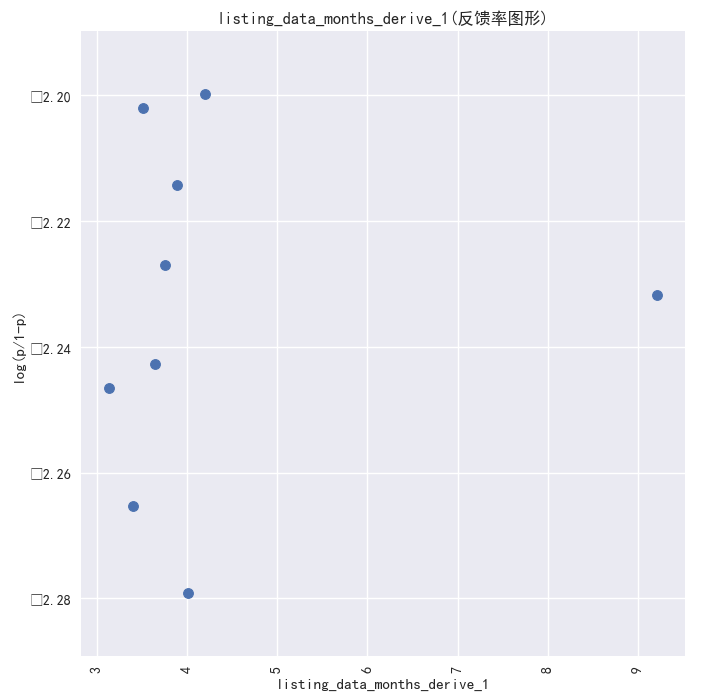

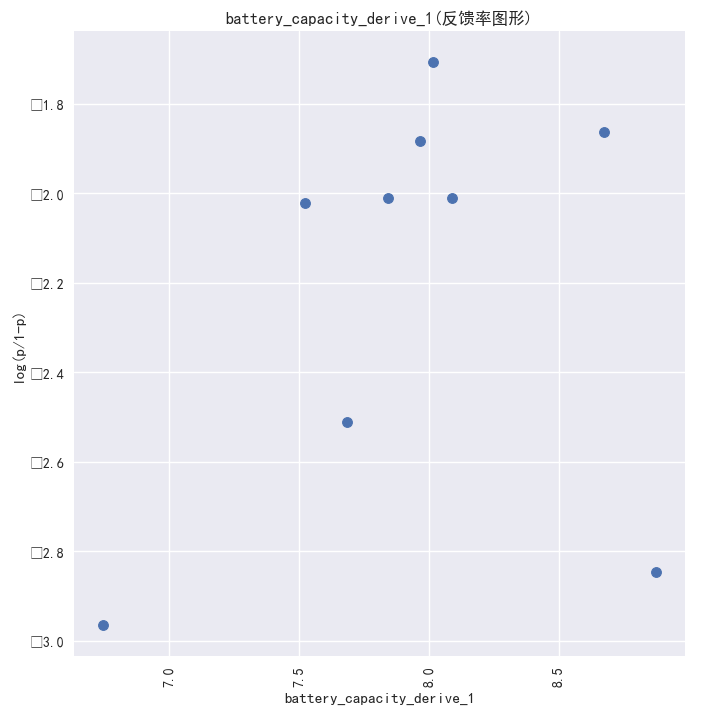

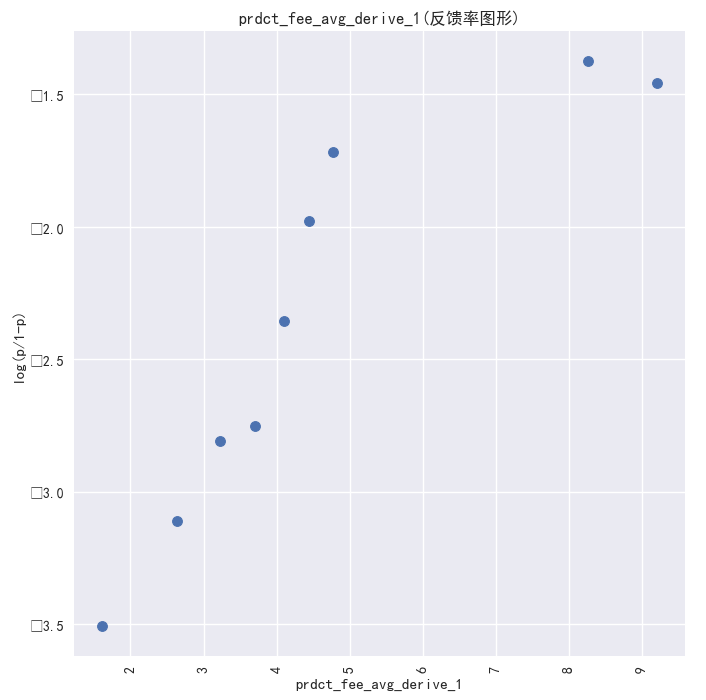

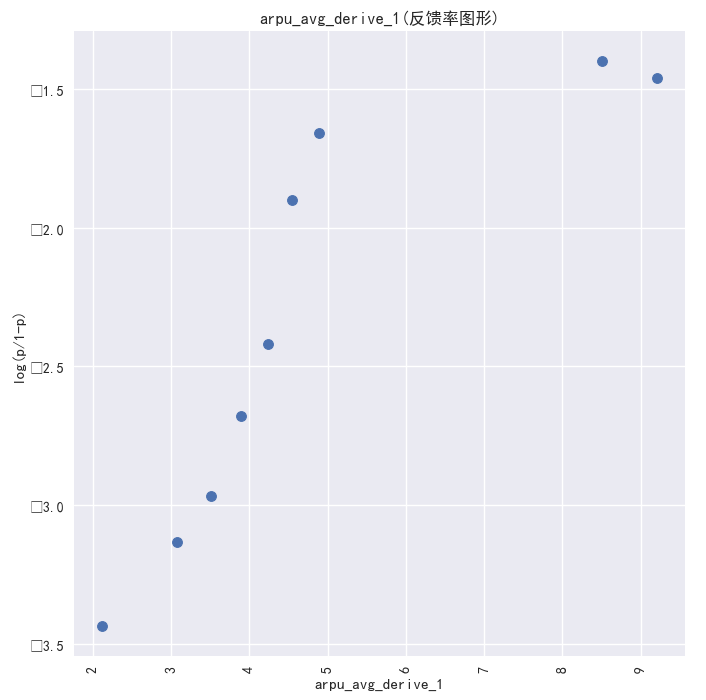

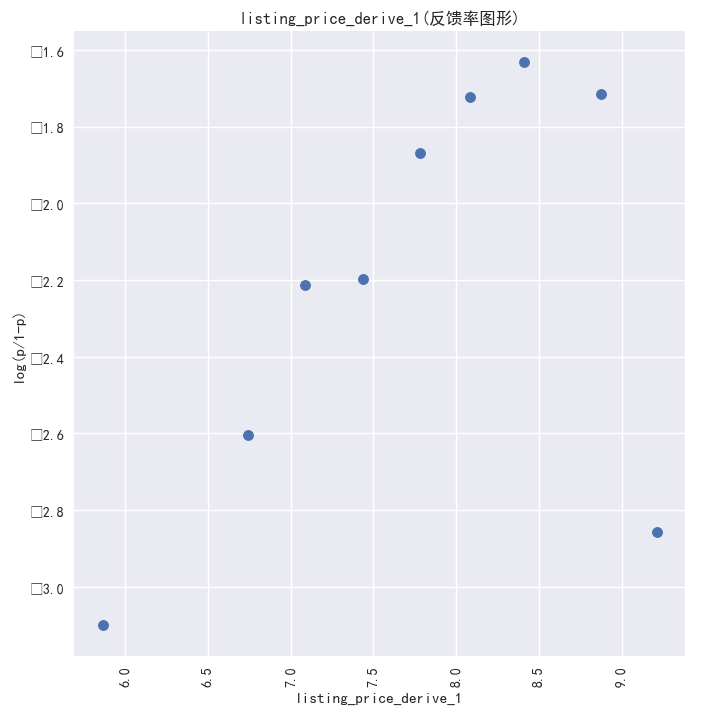

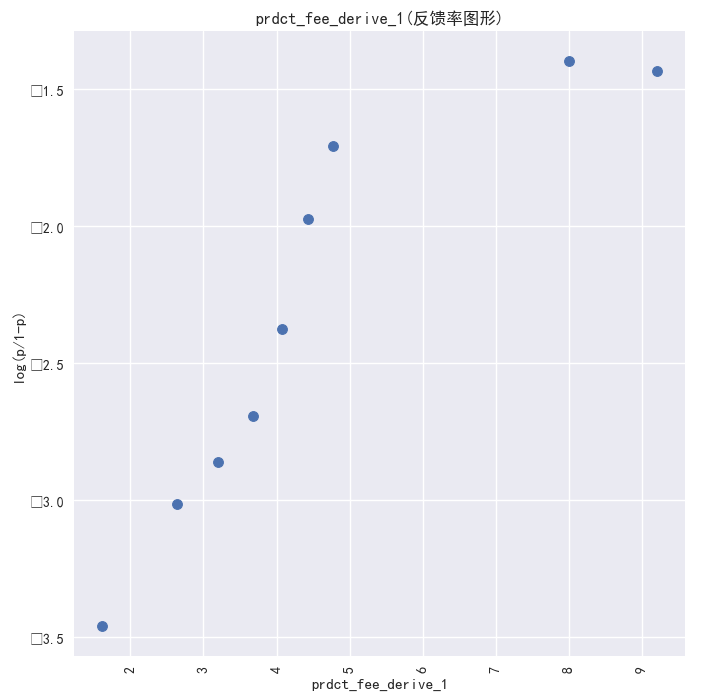

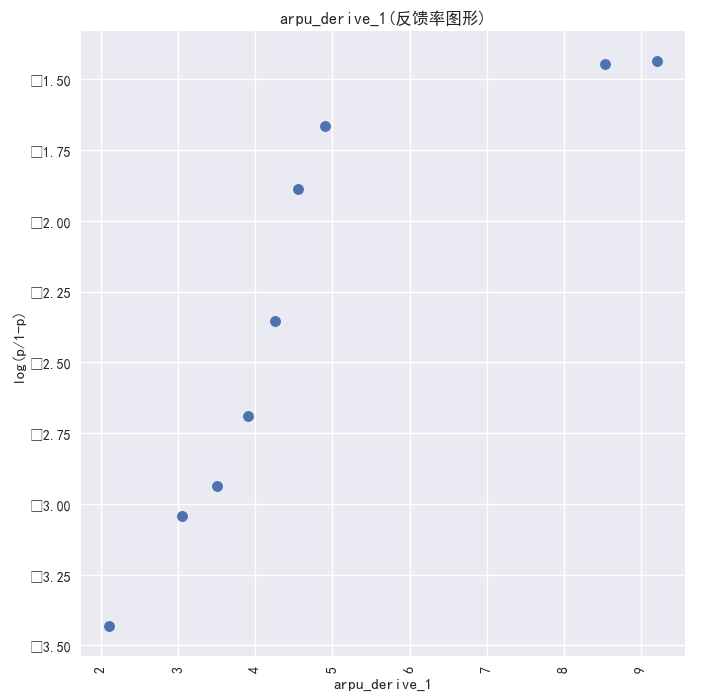

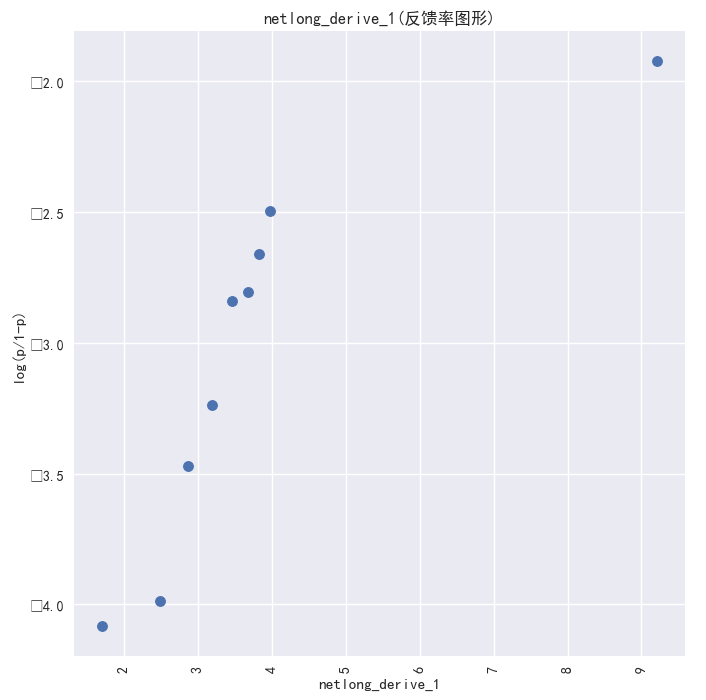

In [160]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=10)
sns.set(font=myfont.get_name())

# 对连续型变量的反馈率数据进行绘图操作：
ContinuousColumnList=[ 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1',]
for ContinuousColumn in ContinuousColumnList:
    #print(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
    ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
    ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
    #ContinuousSampleLogPercentRadio['X_value']=ContinuousSampleLogPercentRadio.index
    #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
    g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)
    g.map(plt.scatter,'X_value',ContinuousColumn,linewidth=.8)
    print(ContinuousColumn,ContinuousSampleLogPercentRadio)
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(ContinuousColumn, "log(p/1-p)");
    #plt.xlim(1,8)
    plt.title(ContinuousColumn+u'(反馈率图形)')
    g.add_legend()
    g.savefig('广发信用卡模型连续型变量反馈率图像\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

In [161]:
xy_1 = pd.read_excel('20190625广发_信用卡_清洗后.xlsx')

In [162]:
xy_1.columns

Index(['target', 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level'],
      dtype='object')

In [164]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
cat_list = ['target', 'listing_data_months_derive_1', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1', 'card_type',
       'netlong', 'owner_city', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'listing_data_months', 'owner_city_level']
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.target特征的类型数量是：2
2.listing_data_months_derive_1特征的类型数量是：9
3.battery_capacity_derive_1特征的类型数量是：9
4.prdct_fee_avg_derive_1特征的类型数量是：10
5.arpu_avg_derive_1特征的类型数量是：10
6.listing_price_derive_1特征的类型数量是：9
7.prdct_fee_derive_1特征的类型数量是：10
8.arpu_derive_1特征的类型数量是：10
9.netlong_derive_1特征的类型数量是：10
10.card_type特征的类型数量是：7
11.netlong特征的类型数量是：59
12.owner_city特征的类型数量是：263
13.arpu特征的类型数量是：19084
14.out_prdct_fee特征的类型数量是：3
15.prdct_fee特征的类型数量是：3589
16.brand特征的类型数量是：0
17.listing_price特征的类型数量是：586
18.user_level特征的类型数量是：9
19.sex特征的类型数量是：3
20.family_client特征的类型数量是：2
21.group_client特征的类型数量是：2
22.music特征的类型数量是：2
23.video_member特征的类型数量是：2
24.finance特征的类型数量是：2
25.arpu_avg特征的类型数量是：53253
26.out_prdct_fee_avg特征的类型数量是：3
27.prdct_fee_avg特征的类型数量是：7951
28.battery_capacity特征的类型数量是：277
29.storage特征的类型数量是：15
30.screen_size特征的类型数量是：71
31.listing_data_months特征的类型数量是：61
32.owner_city_level特征的类型数量是：11


In [2]:
# 删除 listing_data_months_derive_1，card_type，owner_city，listing_data_months

xy_1=ChuanQi_basic_df[['target', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1',
       'netlong', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'owner_city_level']]

NameError: name 'ChuanQi_basic_df' is not defined

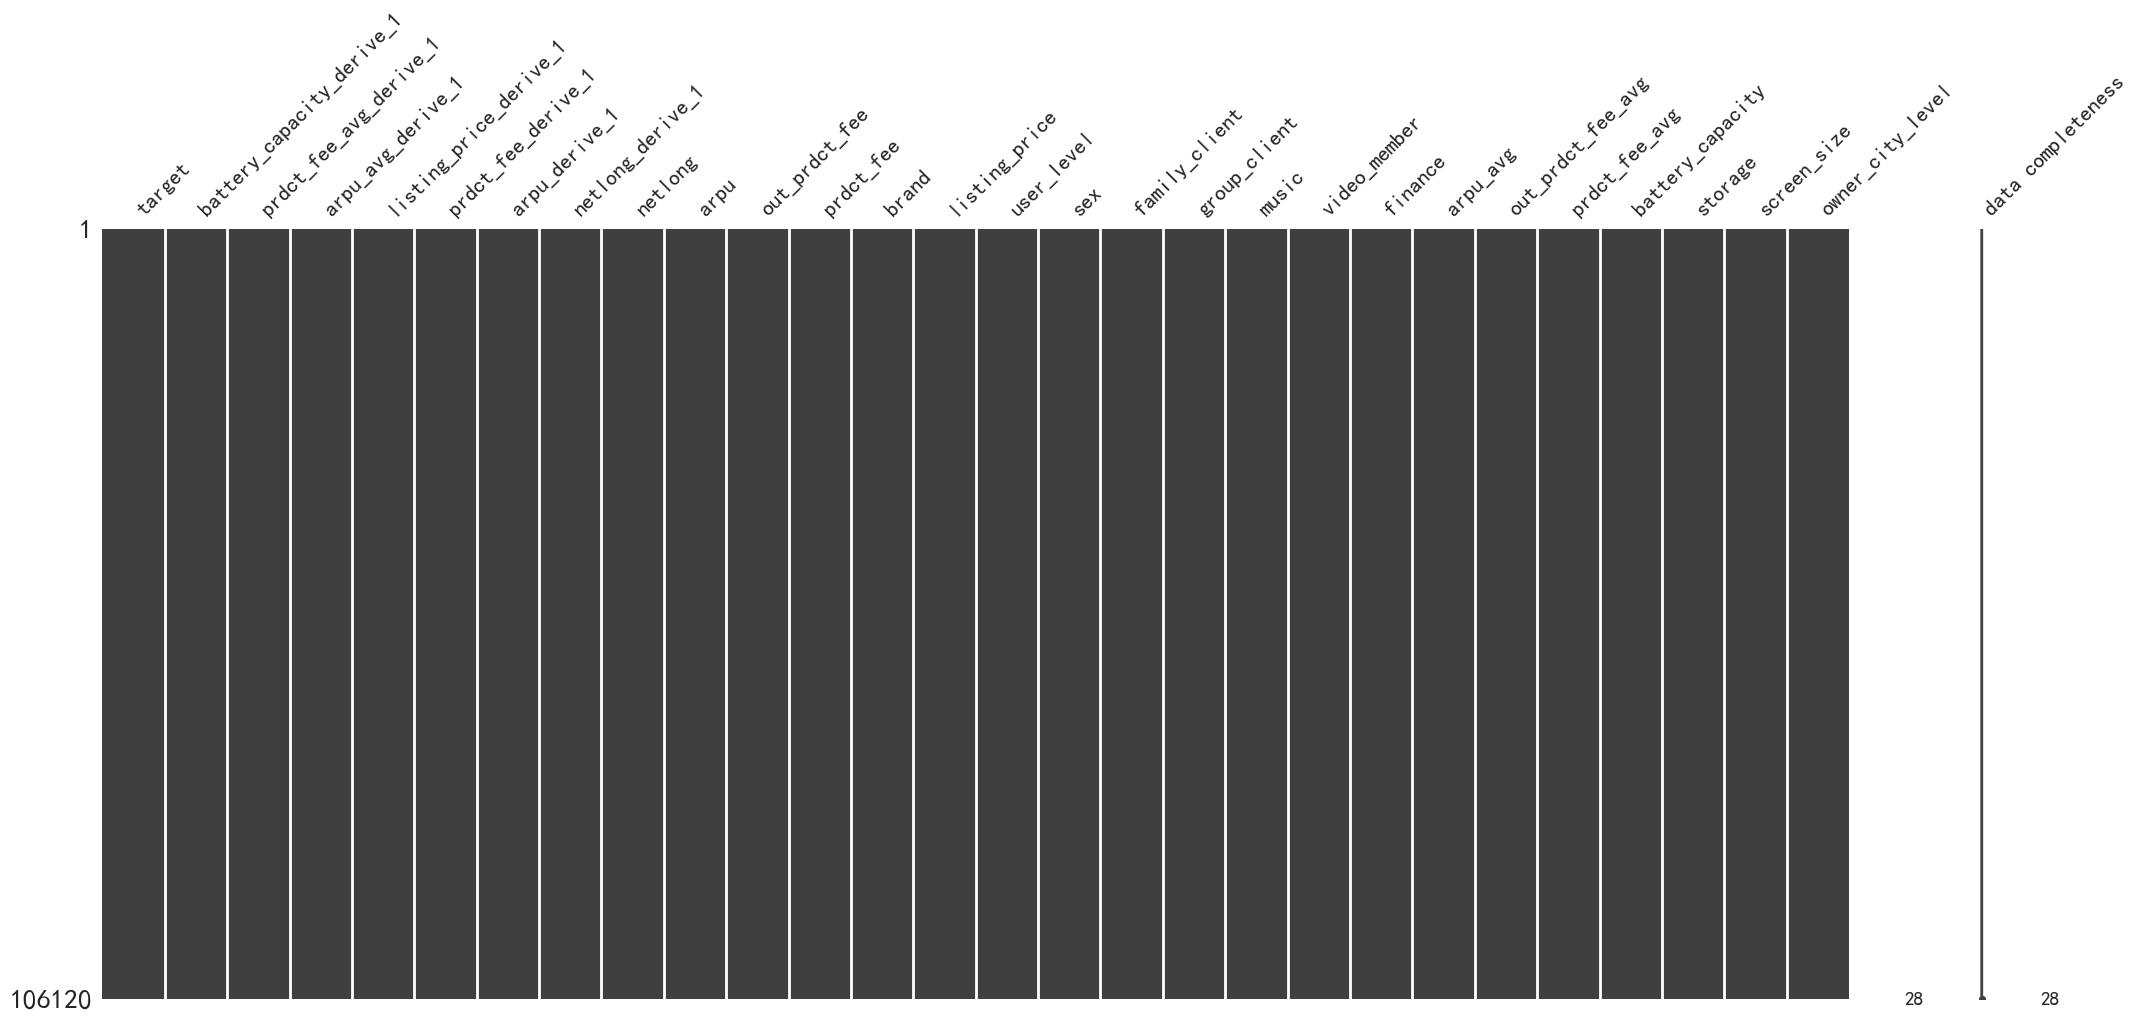

In [172]:
msno.matrix(xy_1,labels = True)

In [173]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,28
Number of observations,106120
Total Missing (%),0.0%
Total size in memory,22.7 MiB
Average record size in memory,224.0 B
Numeric,15
Categorical,1
Boolean,6
Date,0
Text (Unique),0
Rejected,6


In [177]:
for columns in ['target', 'battery_capacity_derive_1',
       'prdct_fee_avg_derive_1', 'arpu_avg_derive_1', 'listing_price_derive_1',
       'prdct_fee_derive_1', 'arpu_derive_1', 'netlong_derive_1',
       'netlong', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'owner_city_level']:
    print(columns,len(xy_1[columns].value_counts()))

target 2
battery_capacity_derive_1 9
prdct_fee_avg_derive_1 10
arpu_avg_derive_1 10
listing_price_derive_1 9
prdct_fee_derive_1 10
arpu_derive_1 10
netlong_derive_1 10
netlong 59
arpu 19084
out_prdct_fee 3
prdct_fee 3589
brand 12
listing_price 586
user_level 9
sex 3
family_client 2
group_client 2
music 2
video_member 2
finance 2
arpu_avg 53253
out_prdct_fee_avg 3
prdct_fee_avg 7951
battery_capacity 277
storage 16
screen_size 71
owner_city_level 11


In [191]:
#去除掉以上列
xy_6 = xy_1[['target', 'battery_capacity_derive_1',
       'netlong', 'arpu', 'out_prdct_fee', 'prdct_fee', 'brand',
       'listing_price', 'user_level', 'sex', 'family_client', 'group_client',
       'music', 'video_member', 'finance', 'arpu_avg', 'out_prdct_fee_avg',
       'prdct_fee_avg', 'battery_capacity', 'storage', 'screen_size',
       'owner_city_level']]

# 连续型特征变量：['netlong','arpu','prdct_fee','listing_price','arpu_avg','prdct_fee_avg','screen_size']
# 去除重复行：
xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [192]:
(xy_6['netlong']==9999).head()

0    False
1    False
2    False
3    False
4    False
Name: netlong, dtype: bool

In [193]:


xy_6['netlong'][(xy_6['netlong']==9999)]=58

xy_6['arpu'][(xy_6['arpu']>400)&(xy_6['arpu']<9999)]=400
xy_6['arpu'][(xy_6['arpu']==9999)]=500

xy_6['prdct_fee'][(xy_6['prdct_fee']>500)&(xy_6['prdct_fee']<9999)]=500
xy_6['prdct_fee'][(xy_6['prdct_fee']==9999)]=400

xy_6['listing_price'][(xy_6['listing_price']==9999)]=400

xy_6['arpu_avg'][(xy_6['arpu_avg']>500)&(xy_6['arpu_avg']<9999)]=500
xy_6['arpu_avg'][(xy_6['arpu_avg']==9999)]=400

xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']>500)&(xy_6['prdct_fee_avg']<9999)]=500
xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']==9999)]=400

xy_6['screen_size'][(xy_6['screen_size']==99)]=0.37

# 电池容量：battery_capacity_derive_1
batterymap={3025:1,5845:1,2875:1,2550:2,3260:2,1850:2,2175:3,7137.5:3,850.4995:3}
xy_6['battery_capacity_derive_1'].replace(batterymap,inplace=True)

# 手机品牌：
brandmap={1:1,2:1,4:2,5:2,6:2,7:2,3:3,8:3,9:3,10:3,11:4,12:4}
xy_6['brand'].replace(brandmap,inplace=True)
# xy_6['brand'][(xy_6['brand']==8)|(xy_6['brand']==10)|(xy_6['brand']==6)] = 1000
# xy_6['brand'][(xy_6['brand']==11)|(xy_6['brand']==7)|(xy_6['brand']==12)|(xy_6['brand']==4)] = 2000
# xy_6['brand'][(xy_6['brand']==9)|(xy_6['brand']==3)|(xy_6['brand']==1)|(xy_6['brand']==2)|(xy_6['brand']==5)] = 3000

# user_level
userlevelmap={4:1,5:1,6:1,7:1,3:2,9999:2,0:3,1:3,2:3}
xy_6['user_level'].replace(userlevelmap,inplace=True)
# xy_6['user_level'][(xy_6['user_level']>=5) & (xy_6['user_level']<=7)] =100
# xy_6['user_level'][(xy_6['user_level']<=4) | (xy_6['user_level']==9999)] = 200

# 内存表：

storagemap={'64GB':1,'128GB':1,'32GB':1,'16GB':1,'4GB':2,'8GB':2,'512MB':2,'nan':2,'256MB':3,'128MB':3,'4MB':3,'其它存储':3,'32MB':3,'64MB':3,'16MB':3,'8MB':3}
xy_6['storage'].replace(storagemap,inplace=True)

# owner_city_level
citylevelmap={8:1,7:1,9:1,9999:1,6:2,10:2,1:2,5:3,4:3,3:3,2:3}
xy_6['owner_city_level'].replace(citylevelmap,inplace=True)
# xy_6['owner_city_level'][xy_6['owner_city_level']>=7] =3
# xy_6['owner_city_level'][(xy_6['owner_city_level']>=4) & (xy_6['owner_city_level']<7)] = 2
# xy_6['owner_city_level'][xy_6['owner_city_level']<=3] = 1



In [194]:
xy_6.columns

Index(['index', 'target', 'battery_capacity_derive_1', 'netlong', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'brand', 'listing_price', 'user_level',
       'sex', 'family_client', 'group_client', 'music', 'video_member',
       'finance', 'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'battery_capacity', 'storage', 'screen_size', 'owner_city_level'],
      dtype='object')

In [196]:
for columns in [ 'target', 'battery_capacity_derive_1', 'netlong', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'brand', 'listing_price', 'user_level',
       'sex', 'family_client', 'group_client', 'music', 'video_member',
       'finance', 'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'battery_capacity', 'storage', 'screen_size', 'owner_city_level']:
    print(columns,len(xy_6[columns].value_counts()))

target 2
battery_capacity_derive_1 3
netlong 59
arpu 18434
out_prdct_fee 3
prdct_fee 3563
brand 4
listing_price 585
user_level 3
sex 3
family_client 2
group_client 2
music 2
video_member 2
finance 2
arpu_avg 53018
out_prdct_fee_avg 3
prdct_fee_avg 7926
battery_capacity 277
storage 3
screen_size 71
owner_city_level 3


In [258]:
# 对模型的离散型变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList=['battery_capacity_derive_1', 'out_prdct_fee',
       'brand', 'user_level', 'sex', 'family_client',
       'group_client', 'music', 'video_member', 'finance',
       'out_prdct_fee_avg', 'storage', 'owner_city_level']

for ClassifyColumn in ClassifyColumnsList:
    #print(ClassifyColumn,len(ChuanQi_basic_df[ClassifyColumn].value_counts()))
    xy_6[ClassifyColumn]=xy_6[ClassifyColumn].astype('str')
xy_7 = xy_6[[ 'target', 'netlong', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'brand', 'listing_price', 'user_level',
       'sex', 'family_client', 'group_client', 'music', 'video_member',
       'finance', 'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'storage', 'screen_size', 'owner_city_level']]
##筛选特定列
display(xy_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103774 entries, 0 to 103773
Data columns (total 20 columns):
target               103774 non-null int64
netlong              103774 non-null float64
arpu                 103774 non-null float64
out_prdct_fee        103774 non-null object
prdct_fee            103774 non-null float64
brand                103774 non-null object
listing_price        103774 non-null float64
user_level           103774 non-null object
sex                  103774 non-null object
family_client        103774 non-null object
group_client         103774 non-null object
music                103774 non-null object
video_member         103774 non-null object
finance              103774 non-null object
arpu_avg             103774 non-null float64
out_prdct_fee_avg    103774 non-null object
prdct_fee_avg        103774 non-null float64
storage              103774 non-null object
screen_size          103774 non-null float64
owner_city_level     103774 non-null object
dty

None

In [259]:
xy_7.brand.value_counts()

4    39108
2    31229
1    22418
3    11019
Name: brand, dtype: int64

In [260]:
xy_7_onehot=pd.get_dummies(xy_7)
xy_7_onehot.columns

Index(['target', 'netlong', 'arpu', 'prdct_fee', 'listing_price', 'arpu_avg',
       'prdct_fee_avg', 'screen_size', 'out_prdct_fee_0.0',
       'out_prdct_fee_1.0', 'out_prdct_fee_9999.0', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0',
       'family_client_1.0', 'family_client_9999.0', 'group_client_1.0',
       'group_client_9999.0', 'music_1.0', 'music_9999.0', 'video_member_1.0',
       'video_member_9999.0', 'finance_1.0', 'finance_9999.0',
       'out_prdct_fee_avg_0.0', 'out_prdct_fee_avg_1.0',
       'out_prdct_fee_avg_9999.0', 'storage_1', 'storage_2', 'storage_3',
       'owner_city_level_1.0', 'owner_city_level_2.0', 'owner_city_level_3.0'],
      dtype='object')

In [261]:
np.isnan(xy_7_onehot).any()#False表示无缺失值
xy_7_onehot[xy_7_onehot.isnull().values==True]

,target,netlong,arpu,prdct_fee,listing_price,arpu_avg,prdct_fee_avg,screen_size,out_prdct_fee_0.0,out_prdct_fee_1.0,...,finance_9999.0,out_prdct_fee_avg_0.0,out_prdct_fee_avg_1.0,out_prdct_fee_avg_9999.0,storage_1,storage_2,storage_3,owner_city_level_1.0,owner_city_level_2.0,owner_city_level_3.0


In [292]:
from sklearn import linear_model as lr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as sm
class_weight = dict({1:9,0:1})#配置权重，1万正样本权重为9,9万随机样本的权重为1
df_x = xy_7_onehot[['netlong', 'arpu', 'prdct_fee', 'listing_price', 'arpu_avg',
       'prdct_fee_avg', 'screen_size', 'out_prdct_fee_0.0',
       'out_prdct_fee_1.0', 'out_prdct_fee_9999.0', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0',
       'family_client_1.0', 'family_client_9999.0', 'group_client_1.0',
       'group_client_9999.0', 'music_1.0', 'music_9999.0', 'video_member_1.0',
       'video_member_9999.0', 'finance_1.0', 'finance_9999.0',
       'out_prdct_fee_avg_0.0', 'out_prdct_fee_avg_1.0',
       'out_prdct_fee_avg_9999.0', 'storage_1', 'storage_2', 'storage_3',
       'owner_city_level_1.0', 'owner_city_level_2.0', 'owner_city_level_3.0']]
df_y = xy_7_onehot['target']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)

#逻辑回归
model = linear_model.LogisticRegression(class_weight = class_weight)
# model = linear_model.Lasso()
model.fit(X_train, Y_train)
y_train_score = model.decision_function(X_train)#用于计算训练集的KS值
y_score = model.decision_function(X_test)#计算预测结果概率值，用于计算测试集的KS值
y_test = model.predict(X_test)
print('模型预测成功率为：',(y_test == Y_test).sum() / len(y_test))
y_test1 = pd.Series(y_test)#**numpy没有value_counts,故要转化为pd.Series.此处是预测值
Y_test1 = pd.Series(Y_test)
print('真实测试数据：\n',Y_test1.value_counts())
print('预测的测试数据：\n', y_test1.value_counts())

模型预测成功率为： 0.7065739009771234
真实测试数据：
 0    46756
1     5131
Name: target, dtype: int64
预测的测试数据：
 0    34663
1    17224
dtype: int64


In [293]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

#对数据的训练集进行标准化
ss = StandardScaler()
X_StandardScaler = ss.fit(X_train)
X_train=X_StandardScaler.transform(X_train)
X_test= X_StandardScaler.transform(X_test)
# X_train = ss.fit_transform(X_train)     #先拟合数据在进行标准化
# X_test = ss.fit_transform(X_test)
display(len(X_train),len(X_test))


lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01)

re = lr.fit(X_train,Y_train)
r_train = re.score(X_train,Y_train)


print("R值(准确率):",r_train)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test)[:5])     #sigmoid函数转化的值，即：概率p


Y_test_predict = lr.predict(X_test)      #预测

# 计算测试集的准确率···
r_test = re.score(X_test,Y_test)
print("R值(准确率):",r_test)
display(Y_test_predict.sum())

51887

51887

R值(准确率): 0.9051785611039374
参数: [[ 0.58164174  0.14242717  0.10427983  0.10132427  0.1463802   0.07804859
   0.03559749 -0.03740682  0.05092614 -0.03928607  0.00759474  0.01987834
  -0.02662591 -0.00830687  0.13360712 -0.02618964 -0.06395271  0.06607739
   0.00159034 -0.05225221 -0.09325912  0.09325912  0.07181496 -0.07181496
   0.05708967 -0.05708967 -0.02472681  0.02472681  0.06680746 -0.06680746
  -0.09230448 -0.10155559  0.14386353  0.12884748 -0.05737677 -0.19436436
   0.24136217  0.04138681 -0.22194122]]
截距: [-2.73352289]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.8447068  0.1552932 ]
 [0.93667673 0.06332327]
 [0.68544438 0.31455562]
 [0.56578296 0.43421704]
 [0.95348368 0.04651632]]
R值(准确率): 0.9009578507140517


284

In [294]:
# 绘制模型的Roc/Auc值的曲线图

from sklearn import metrics

lr_y_test_score = lr.decision_function(X_test)
lr_fpr_test,lr_tpr_test,lr_threasholds_test = metrics.roc_curve(Y_test.ravel(),lr_y_test_score.ravel())
lr_auc_test = metrics.auc(lr_fpr_test,lr_tpr_test)

lr_y_train_score = lr.decision_function(X_train)
lr_fpr_train,lr_tpr_train,lr_threasholds_train = metrics.roc_curve(Y_train.ravel(),lr_y_train_score.ravel())  #Y_predict
lr_auc_train = metrics.auc(lr_fpr_train,lr_tpr_train)


print("Logistic算法R值(训练):",lr.score(X_train,Y_train))
print("Logistic算法AUC值(训练):",lr_auc_train)

print("Logistic算法R值(测试):",lr.score(X_test,Y_test))
print("Logistic算法AUC值(测试):",lr_auc_test)

Logistic算法R值(训练): 0.9051785611039374
Logistic算法AUC值(训练): 0.772116001805015
Logistic算法R值(测试): 0.9009578507140517
Logistic算法AUC值(测试): 0.7710129915738826


In [295]:
# 在训练集上统计十等分检验表：
Y_train_proba=lr.predict_proba(X_train)
Y_train_predict=lr.predict(X_train)
Y_train_predict_true=Y_train_proba[:,1]

Y_test_proba=lr.predict_proba(X_test)
Y_test_predict=lr.predict(X_test)
Y_test_predict_true=Y_test_proba[:,1]
Y_train_predict.sum()

293

In [296]:
# 训练集的十等分表：
IndexSeriers=pd.Series(np.arange(0,10,1))


Result_KS_10_Dic={'Train_KS_10':{},'Test_KS_10':{}}
Result_KS_10_Dic['Train_KS_10']['y_train']=Y_train
Result_KS_10_Dic['Train_KS_10']['y_train_predict']=Y_train_predict
Result_KS_10_Dic['Train_KS_10']['y_train_true_proba']=Y_train_predict_true
Train_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Train_KS_10'])

Result_KS_10_Dic['Test_KS_10']['y_test']=Y_test
Result_KS_10_Dic['Test_KS_10']['y_test_predict']=Y_test_predict
Result_KS_10_Dic['Test_KS_10']['y_test_true_proba']=Y_test_predict_true
Test_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Test_KS_10'])
display(Train_KS_10_df.head(),len(Train_KS_10_df),Test_KS_10_df.head(),len(Test_KS_10_df))
# 对概率值进行降序排列：
Train_KS_10_df.sort_values('y_train_true_proba',ascending=False,inplace=True)
Train_KS_10_df.reset_index(inplace=True)
Train_KS_10_df['true_proba_cluster']=pd.qcut(Train_KS_10_df.y_train_true_proba,10)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.DataFrame(Train_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['KS_10_cluster_crowd_number'])

# 对测试值进行降序排列：
Test_KS_10_df.sort_values('y_test_true_proba',ascending=False,inplace=True)
Test_KS_10_df.reset_index(inplace=True)
Test_KS_10_df['true_proba_cluster']=pd.qcut(Test_KS_10_df.y_test_true_proba,10)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.DataFrame(Test_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])


,y_train,y_train_predict,y_train_true_proba
92074,0,0,0.011866
52217,0,0,0.125769
95837,0,0,0.028954
1557,0,0,0.033489
63069,1,0,0.108161


51887

,y_test,y_test_predict,y_test_true_proba
78741,0,0,0.155293
41822,0,0,0.063323
17301,0,0,0.314556
50761,1,0,0.434217
20459,0,0,0.046516


51887

,index,true_proba_cluster,0
0,"(0.21, 0.79]",5189,0
1,"(0.148, 0.21]",5189,1
2,"(0.111, 0.148]",5188,2
3,"(0.086, 0.111]",5189,3
4,"(0.0658, 0.086]",5188,4
5,"(0.0498, 0.0658]",5189,5
6,"(0.0361, 0.0498]",5189,6
7,"(0.024, 0.0361]",5188,7
8,"(0.0129, 0.024]",5189,8
9,"(-8.300000000000007e-05, 0.0129]",5189,9


,index,true_proba_cluster,0
0,"(0.211, 0.826]",5189,0
1,"(0.148, 0.211]",5189,1
2,"(0.111, 0.148]",5188,2
3,"(0.0861, 0.111]",5189,3
4,"(0.0657, 0.0861]",5188,4
5,"(0.0497, 0.0657]",5189,5
6,"(0.0362, 0.0497]",5189,6
7,"(0.0243, 0.0362]",5188,7
8,"(0.013, 0.0243]",5189,8
9,"(-0.00010000000000000005, 0.013]",5189,9


In [297]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['KS_10_cluster_map'][Result_KS_10_Dic['KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['KS_10_cluster_map'])

# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['Test_KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['Test_KS_10_cluster_map'][Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['Test_KS_10_cluster_map'])

{Interval(0.21, 0.79, closed='right'): 0,
 Interval(0.148, 0.21, closed='right'): 1,
 Interval(0.111, 0.148, closed='right'): 2,
 Interval(0.086, 0.111, closed='right'): 3,
 Interval(0.0658, 0.086, closed='right'): 4,
 Interval(0.0498, 0.0658, closed='right'): 5,
 Interval(0.0361, 0.0498, closed='right'): 6,
 Interval(0.024, 0.0361, closed='right'): 7,
 Interval(0.0129, 0.024, closed='right'): 8,
 Interval(-8.300000000000007e-05, 0.0129, closed='right'): 9}

{Interval(0.211, 0.826, closed='right'): 0,
 Interval(0.148, 0.211, closed='right'): 1,
 Interval(0.111, 0.148, closed='right'): 2,
 Interval(0.0861, 0.111, closed='right'): 3,
 Interval(0.0657, 0.0861, closed='right'): 4,
 Interval(0.0497, 0.0657, closed='right'): 5,
 Interval(0.0362, 0.0497, closed='right'): 6,
 Interval(0.0243, 0.0362, closed='right'): 7,
 Interval(0.013, 0.0243, closed='right'): 8,
 Interval(-0.00010000000000000005, 0.013, closed='right'): 9}

In [298]:
Train_KS_10_df['true_proba_cluster_map']=Train_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['KS_10_cluster_map'])

Test_KS_10_df['true_proba_cluster_map']=Test_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['Test_KS_10_cluster_map'])

Train_KS_10_df_groupby_true_proba_cluster_map=Train_KS_10_df.groupby('true_proba_cluster_map')

Test_KS_10_df_groupby_true_proba_cluster_map=Test_KS_10_df.groupby('true_proba_cluster_map')

Result_KS_10_Dic['KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Train_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['KS_10_TPV_Number'][proba_cluster_map]=(Train_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_train']==1).sum()
    
Result_KS_10_Dic['Test_KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Test_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['Test_KS_10_TPV_Number'][proba_cluster_map]=(Test_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_test']==1).sum()


Result_KS_10_Dic['Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['KS_10_TPV_Number'])
Result_KS_10_Dic['Real_True_Sample_number_rate3']=Result_KS_10_Dic['Real_True_Sample_number']/Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['KS_10_TPV_Number'].values())).sum())

#Result_KS_10_Dic['Test_KS_10_TPV_Number']
Result_KS_10_Dic['Test_Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['Test_KS_10_TPV_Number'])
Result_KS_10_Dic['Test_Real_True_Sample_number_rate3']=Result_KS_10_Dic['Test_Real_True_Sample_number']/Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Test_Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['Test_KS_10_TPV_Number'].values())).sum())


Result_KS_10_Statistics_df=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Real_True_Sample_number'],Result_KS_10_Dic['Real_True_Sample_number_rate3'],Result_KS_10_Dic['Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_df.columns=['CustomNumber','True_Sample_CustomNumber','Real_True_Sample_number_rate3','Real_True_Sample_number_rate4']
Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_df['ModelAcquireVaue']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']


Result_KS_10_Statistics_Test_df=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Test_Real_True_Sample_number'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate3'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_Test_df.columns=['Test_CustomNumber','Test_True_Sample_CustomNumber','Test_Real_True_Sample_number_rate3','Test_Real_True_Sample_number_rate4']
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']




In [299]:
Result_KS_10_Dic['KS_Point']={'x_point':Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['KS_Point'])

Result_KS_10_Dic['Test_KS_Point']={'x_point':Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['Test_KS_Point'])

{'x_point': 2, 'y_point': 0.660045054269916}

{'x_point': 2, 'y_point': 0.6564022607678814}

In [300]:
#每个箱子中箱子正样本比例Real_True_Sample_number_rate3=True_Sample_CustomNumber/ CustomNumber
#箱子正样本占总正样本比例Real_True_Sample_number_rate4=True_Sample_CustomNumber/ΣTrue_Sample_CustomNumber
#累计和Real_True_Sample_number_rate4_accumulate=ΣReal_True_Sample_number_rate4
display(Result_KS_10_Statistics_df,Result_KS_10_Statistics_Test_df)

,CustomNumber,True_Sample_CustomNumber,Real_True_Sample_number_rate3,Real_True_Sample_number_rate4,Real_True_Sample_number_rate4_accumulate,Real_True_Sample_number_rate_random,ModelAcquireVaue
0,5189,1594,0.307188,0.326439,0.326439,0.000000,0.326439
1,5189,953,0.183658,0.195167,0.521606,0.111111,0.410494
2,5188,676,0.130301,0.138439,0.660045,0.222222,0.437823
3,5189,515,0.099248,0.105468,0.765513,0.333333,0.432180
4,5188,399,0.076908,0.081712,0.847225,0.444444,0.402781
5,5189,272,0.052419,0.055703,0.902929,0.555556,0.347373
6,5189,191,0.036809,0.039115,0.942044,0.666667,0.275377
7,5188,125,0.024094,0.025599,0.967643,0.777778,0.189865
8,5189,115,0.022162,0.023551,0.991194,0.888889,0.102305
9,5189,43,0.008287,0.008806,1.000000,1.000000,0.000000


,Test_CustomNumber,Test_True_Sample_CustomNumber,Test_Real_True_Sample_number_rate3,Test_Real_True_Sample_number_rate4,Test_Real_True_Sample_number_rate4_accumulate,Test_Real_True_Sample_number_rate_random,Test_ModelAcquireVaue
0,5189,1636,0.315282,0.318846,0.318846,0.000000,0.318846
1,5189,994,0.191559,0.193724,0.512571,0.111111,0.401460
2,5188,738,0.142251,0.143832,0.656402,0.222222,0.434180
3,5189,522,0.100597,0.101735,0.758137,0.333333,0.424803
4,5188,447,0.086160,0.087118,0.845254,0.444444,0.400810
5,5189,294,0.056658,0.057299,0.902553,0.555556,0.346998
6,5189,228,0.043939,0.044436,0.946989,0.666667,0.280322
7,5188,131,0.025251,0.025531,0.972520,0.777778,0.194742
8,5189,94,0.018115,0.018320,0.990840,0.888889,0.101951
9,5189,47,0.009058,0.009160,1.000000,1.000000,0.000000


Optimization terminated successfully.
         Current function value: 0.307671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309105
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.304808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311281
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.304807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306649
  

Optimization terminated successfully.
         Current function value: 0.287723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287948
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285041
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286035
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287847
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287667
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285345
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283192
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288027
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281550
  

Optimization terminated successfully.
         Current function value: 0.276918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277680
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.276732
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277819
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277845
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277845
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277111
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277704
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277737
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277619
  

Optimization terminated successfully.
         Current function value: 0.275602
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275294
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275451
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275881
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275697
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275909
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275780
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275292
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275822
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275205
  

Optimization terminated successfully.
         Current function value: 0.273672
         Iterations 8
Add  out_prdct_fee_avg_9999.0       with p-value 7.90749e-21
Optimization terminated successfully.
         Current function value: 0.273447
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273389
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273180
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273390
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273225
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273022
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273212
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273296
         Iterations 8
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.271412
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271792
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271822
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271821
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271807
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271639
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271700
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271823
  

Optimization terminated successfully.
         Current function value: 0.270624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270600
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270599
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270623
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270590
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270455
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270516
  

Optimization terminated successfully.
         Current function value: 0.269958
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269928
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269940
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269931
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269959
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269940
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269959
         Iterations 8
resulting features:
['arpu_avg', 'netlong', 'owner_city_level_3.0', 'storage_1', 'owner_city_level_1.0', 'listing_price', 'finance_9999.0', 'prdct_fee', 'out_prdct_fee_avg_9999.0', 'user_level_1.0', 'group_client_1.0', 'family_client_9999.0', 'sex_0.0', 'music_9999.0', 'storage_3', 'ou

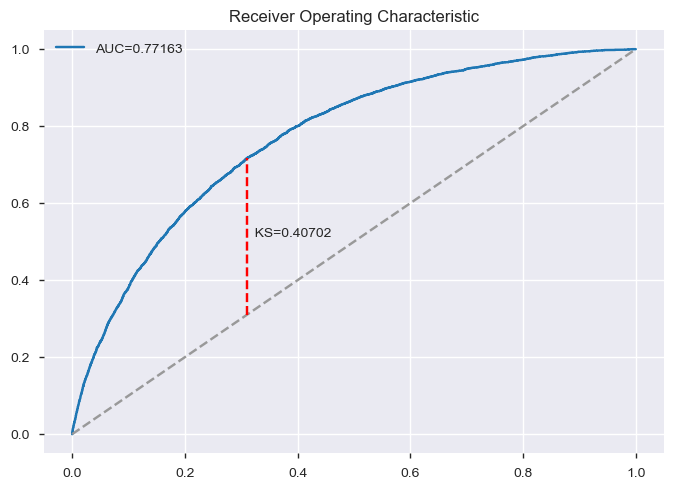

In [301]:
#显著性分析代码：p>|z|大于0.01的进入模型
#AUC（模型稳定性）和KS（区分能力）值计算
# Coef. :参数、系数
# Std. Err.：系数Coef.的方差的平方根standard error
# [95% Conf. Interval] 系数Coef.的95%置信区间
# P>|z|: 值小于或等于0.05表示结果显著。 
#两个变量协方差分析相关性强，保留Z值绝对值大（显著性强）的那个，如brand和list_price相关性强，就把Z值大的brand2留下
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose = True):
    included = list(initial_list)
 
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
 
result = stepwise_selection(X_train, Y_train)#模板改这里的参数X_train, Y_train
 
print('resulting features:')
print(result)

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

In [302]:
# VIF<5则满足要求，去除掉listing_price,再跑上面模型
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X = np.matrix(xy_7_onehot[['arpu_avg', 'netlong', 'owner_city_level_3.0', 'storage_1', 'owner_city_level_1.0', 'listing_price', 'finance_9999.0', 'prdct_fee', 'out_prdct_fee_avg_9999.0', 'user_level_1.0', 'group_client_1.0','family_client_9999.0','music_9999.0','storage_3','out_prdct_fee_1.0','video_member_9999.0']])
VIF_list = [vif(X, i) for i in range(X.shape[1])]
max_VIF = max(VIF_list)
print (VIF_list)

[4.055460428407306, 8.248519049986553, 3.150469354873044, 3.210444211073114, 1.6127484621587866, 3.150776494759972, 6.395079562520459, 3.0631387549481697, 4.5755432289265165, 1.3627768641904359, 1.3767243691283, 3.892776674933443, 5.454249079244678, 1.0946748715774308, 2.430056865445982, 6.586479227620795]


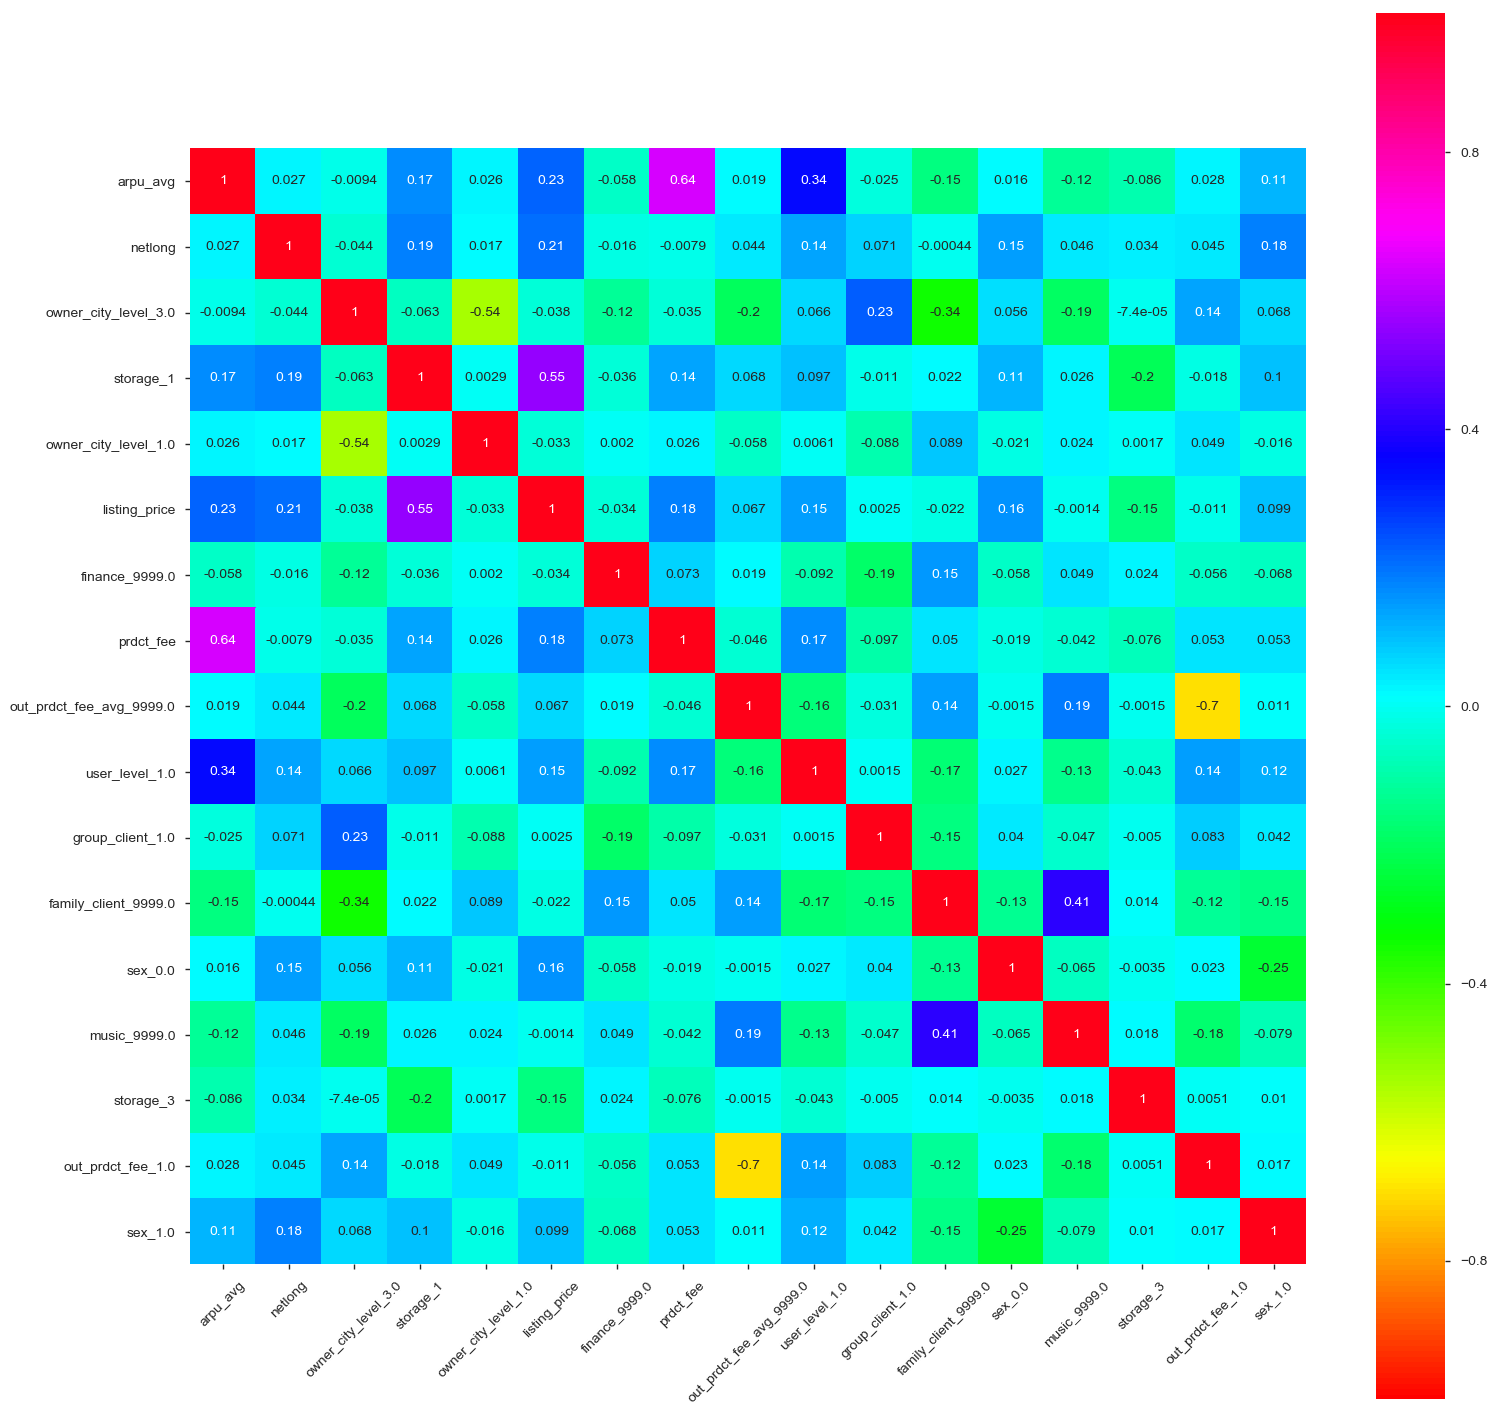

In [303]:
UsefulColumnsList=['arpu_avg', 'netlong', 'owner_city_level_3.0', 'storage_1', 'owner_city_level_1.0', 'listing_price', 'finance_9999.0', 'prdct_fee', 'out_prdct_fee_avg_9999.0', 'user_level_1.0', 'group_client_1.0','family_client_9999.0','sex_0.0','music_9999.0','storage_3','out_prdct_fee_1.0','sex_1.0']

# 对选取的列特征进行相关性分析：
xy_7_onehot_corr=xy_7_onehot[UsefulColumnsList].corr()
import seaborn as sns
from matplotlib import pyplot as plt
fig=plt.figure()
fig.set_size_inches(18,18)
ax1=fig.add_subplot(111)
# 默认是0到1的，vmin和vmax可自定义设置
sns.heatmap(xy_7_onehot_corr,vmin=-1, vmax=1 ,cmap='hsv', annot=True, square=True)
ax1.set_xticklabels(UsefulColumnsList,rotation= 45)
plt.show()

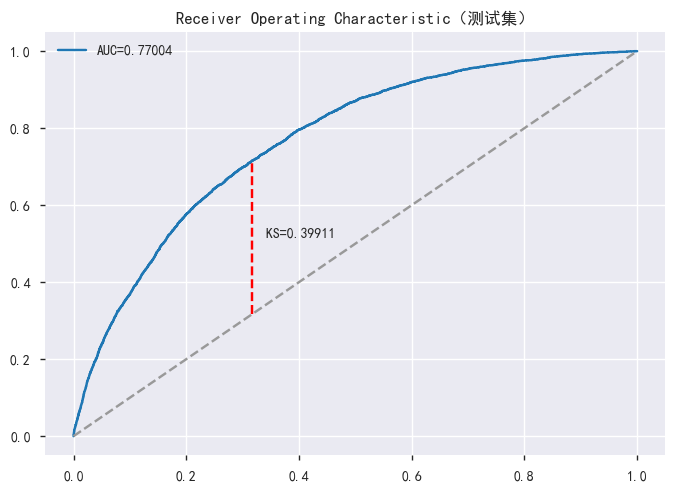

In [309]:
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

y_testpredicted = rst.predict(sm.add_constant(X_test[result]))

fpr, tpr, thresholds = roc_curve(Y_test,y_testpredicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title(u'Receiver Operating Characteristic（测试集）')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  